# Evaluación 4

## TAREA 1

 Use two maps of points
  Compute de distance matrix for both maps
 
 

Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your chooing.

In [1]:
# Primero, se obtiene el mapa base y los dos mapas de puntos
import os
import pandas as pd 
import geopandas as gpd

## Mapa base
CDRMaps='https://github.com/225225225225/simpleplot_MBC/raw/main/maps/CongoDRC.gpkg'
CDR=gpd.read_file(CDRMaps,layer='countries')
CDR_cities=gpd.read_file(CDRMaps,layer='cities')
CDR_rivers=gpd.read_file(CDRMaps,layer='rivers')

## Dos mapas de puntos.
### El primero es un shp que conseguí en https://data.humdata.org/dataset/hotosm_cod_education_facilities
### El segundo son los datos de centros de salud que procesé para la tarea 3 y que guardé como un csv
CDR_Ed=gpd.read_file(os.path.join("maps","DRC_Education","hotosm_cod_education_facilities_points.shp"))
CDR_Salud=pd.read_csv(os.path.join('data', 'Salud_CDR.csv'))

In [2]:
# Se revisa a qué clase pertenece lo que se creó
type(CDR), type(CDR_Ed), type(CDR_Salud)

(geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame,
 pandas.core.frame.DataFrame)

In [3]:
# Falta convertir a la información de salud en gdf!
CDR_Salud=gpd.GeoDataFrame(CDR_Salud,
                       geometry=gpd.points_from_xy(CDR_Salud.Long,
                                             CDR_Salud.Lat),
                 crs=4326)

<Axes: >

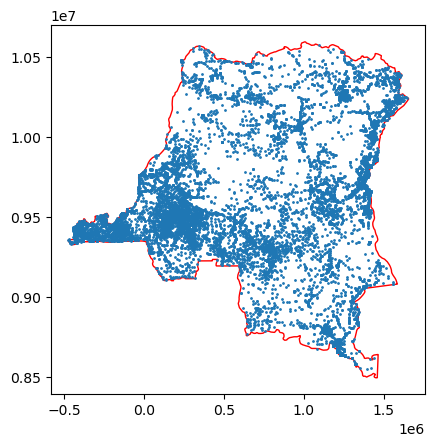

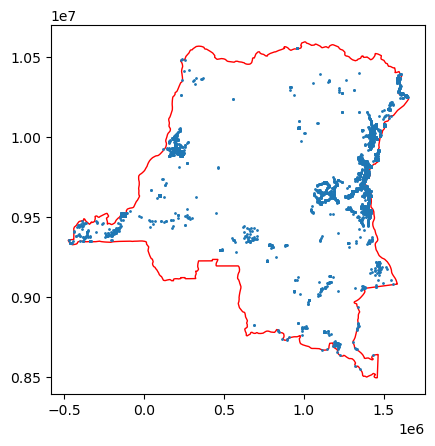

In [4]:
# Finalmente, se les asigna a todos el crs deseado y se grafican juntos para saber si todo funcionó bien
CDR_Salud = CDR_Salud.to_crs(32734)
CDR_Ed = CDR_Ed.to_crs(32734)
CDR = CDR.to_crs(32734)

base = CDR.plot(color='white', edgecolor='red')
CDR_Salud.plot(ax=base,markersize=1),

base = CDR.plot(color='white', edgecolor='red')
CDR_Ed.plot(ax=base,markersize=1)

In [5]:
# Ahora sí, se calculan las distancias entre los puntos
## Primero, se subdividen los puntos: se calcularán las distancias entre las universidades y las organizaciones de salud financiadas por la comunidad
Salud_Comunidad = CDR_Salud[CDR_Salud['Ownership']=='CBO'].copy()
Educacion_Universidades = CDR_Ed[CDR_Ed['amenity']=='university'].copy()

## Posteriormente, se encontró que había nombres repetidos, por lo que no se podía calcular la matriz correctamente. Para solucionar esto, 
## Se fusionaron los nombres del centro de salud con la región para los centros de salud
Salud_Comunidad["Facility"] = Salud_Comunidad[["Facility_n","Admin1"]].agg('_'.join, axis=1)
Educacion_Universidades["Name"] = Educacion_Universidades[["name","amenity"]].agg('_'.join, axis=1)

## Después, se seleccionan solo las columnas de interés
S_Com = Salud_Comunidad[['Facility', 'Ownership', 'geometry']].copy()
E_Uni = Educacion_Universidades[['Name', 'amenity', 'geometry']].copy()

## Finalmente, se resettean los índices
S_Com.reset_index(drop=True, inplace=True)
E_Uni.reset_index(drop=True, inplace=True)

In [6]:
## El problema de los duplicados persistió, porque había una universidad repetida varias veces, que se tuvo que eliminar manualmente
E_Uni.drop(53,axis=0,inplace=True)
E_Uni.drop(52,axis=0,inplace=True)
E_Uni.reset_index(drop=True, inplace=True)

<Axes: >

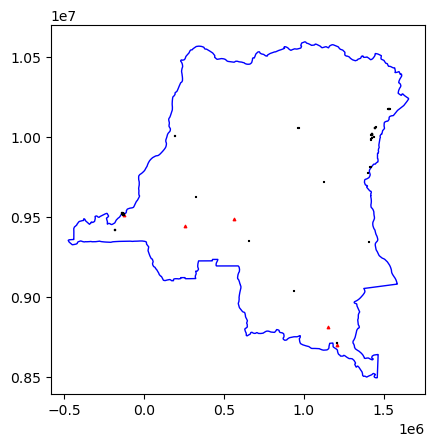

In [7]:
# Se plotean juntas para hacerse una idea de qué esperar
base = CDR.plot(color='white', edgecolor='blue')
S_Com.plot(ax=base,markersize=3, color = 'red', marker="^")
E_Uni.plot(ax=base,markersize=3, color = 'black',marker="+")

In [8]:
# Ahora, se calcula la matriz con las distancias entre los puntos, en kilometros de distancia
Distancias_EdSal = S_Com.set_index('Facility').geometry.apply\
(lambda g: E_Uni.set_index('Name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
Distancias_EdSal

Name,Bureau Administratif Université Methodiste_university,Bureau ISBTP/Beni_university,Bâtiment de Licence UPKAN_university,Cybercafé & auditoires_university,Faculté d'Agronomie_university,Faculté d'Architecture_university,Faculté de Médecine_university,Guesthouse & accueil_university,IEM_university,ISBN de Beni_university,...,Université UCBC_university,Université de Bunia_university,Université de Développement de Lubero_university,Université de Kalemie_university,Université de Réveil Christ Roi_university,Université du Cepromad de Bunia_university,Université du Cepromad_university,Université Évangélique pour le Progrès de l'Ituri_university,Univertisité de Kisangani_university,faculté de sience et de droit_university
Facility,,,,,,,,,,,,,,,,,,,,,
Action Communautaire Centre de Santé_Haut Katanga,429.442890,1379.300007,853.688001,1565.038558,12.498069,1564.980733,11.519230,1565.005097,1656.108336,1379.490737,...,1384.253380,1513.287563,1302.650125,674.581609,1334.589353,1513.544028,1569.214888,1513.718441,1382.388275,1580.901119
Bulape Communautaire Centre de Santé_Kasai Occidental,592.995108,1051.939193,169.450630,745.926569,1012.260243,745.860261,1013.341679,745.880178,634.787248,1052.408755,...,1056.458210,1190.882369,989.856128,862.759928,1014.659000,1190.409000,693.009347,1191.920092,698.917972,700.149985
Communau Poste de Santé_Kwilu,797.417573,1339.822609,410.802732,438.375899,1200.254812,438.309486,1201.265853,438.329950,569.476119,1340.306194,...,1344.082470,1473.472094,1282.282487,1159.170885,1305.141296,1472.916915,394.485681,1474.551717,940.248042,403.254086
Communautaire Centre de Santé_Haut Katanga,306.215884,1281.994453,730.912374,1463.074549,114.964094,1463.015188,116.063416,1463.039474,1531.883162,1282.212784,...,1287.034067,1419.423215,1204.520541,592.778768,1236.747517,1419.622670,1462.150242,1419.914834,1262.805129,1473.545430
Communautaire Centre de Santé_Kinshasa,1167.583723,1661.891879,796.901468,111.559887,1554.323225,111.523354,1555.278993,111.524006,589.527640,1662.388799,...,1665.683172,1785.279620,1612.399219,1544.103398,1631.811509,1784.610431,8.200251,1786.404637,1218.665908,19.846265


In [9]:
# Después, se calculan las distancias mínimas de universidades a cada centro de salud comunitario
Distancias_EdSal.idxmin(axis=1)

Facility
Action Communautaire Centre de Santé_Haut Katanga                        Faculté de Médecine_university
Bulape Communautaire Centre de Santé_Kasai Occidental              Bâtiment de Licence UPKAN_university
Communau Poste de Santé_Kwilu                            Institut technique agricole d'Oshwe_university
Communautaire Centre de Santé_Haut Katanga                               Faculté d'Agronomie_university
Communautaire Centre de Santé_Kinshasa                               Université Révérend KIM_university
dtype: object

<Axes: >

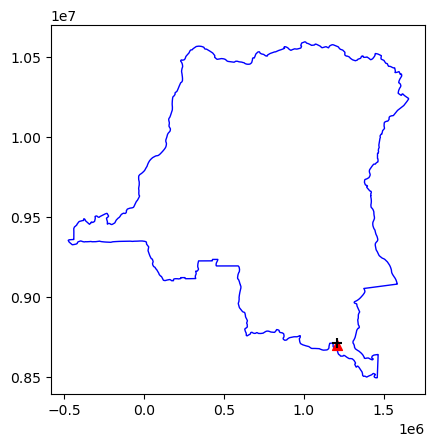

In [10]:
#Finalmente, se grafica el par de puntos para la primera fila de la matriz
base = CDR.plot(color='white', edgecolor='blue')
S_Com.iloc[[0], :].plot(ax=base,markersize=50, color = 'red', marker="^")
E_Uni.iloc[[10], :].plot(ax=base,markersize=50, color = 'black',marker="+")

## TAREA 2: 
Use a map of points and a map of lines.

Compute the distance matrix for both maps.

Select one line of the distance matrix, and plot the closests and the farthest point to that line.

In [11]:
# Se calcula la distancia entre los ríos principales y los centros de salud comunitarios
## Primero, hay que ponerle el crs correcto
CDR_rivers = CDR_rivers.to_crs(32734)

## Ahora sí, se calcula
Distancias_RiosCBO=CDR_rivers.set_index('NAME').geometry.apply\
(lambda g: S_Com.set_index('Facility').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
Distancias_RiosCBO

Facility,Action Communautaire Centre de Santé_Haut Katanga,Bulape Communautaire Centre de Santé_Kasai Occidental,Communau Poste de Santé_Kwilu,Communautaire Centre de Santé_Haut Katanga,Communautaire Centre de Santé_Kinshasa
NAME,,,,,
Congo,684.747589,523.684557,328.583975,573.568738,5.664228
Lualaba,91.610105,629.532120,894.675885,108.228132,1264.531350
Lukaga,533.741631,629.532120,927.089228,508.594172,1311.444995
Ubangi,1604.324686,609.710482,495.973888,1507.848155,482.516747
White Nile,1534.260652,1248.057013,1533.283756,1443.993205,1848.216441
Zambezi,332.677524,770.753523,896.991175,267.952787,1227.293498


In [12]:
# Como el país es el Congo, DR, se trabajará con el río del mismo nombre
Congo_Max=Distancias_RiosCBO.idxmax(axis="columns")
Congo_Min=Distancias_RiosCBO.idxmin(axis="columns")
Congo_Max, Congo_Min

(NAME
 Congo         Action Communautaire Centre de Santé_Haut Katanga
 Lualaba                  Communautaire Centre de Santé_Kinshasa
 Lukaga                   Communautaire Centre de Santé_Kinshasa
 Ubangi        Action Communautaire Centre de Santé_Haut Katanga
 White Nile               Communautaire Centre de Santé_Kinshasa
 Zambezi                  Communautaire Centre de Santé_Kinshasa
 dtype: object,
 NAME
 Congo                    Communautaire Centre de Santé_Kinshasa
 Lualaba       Action Communautaire Centre de Santé_Haut Katanga
 Lukaga               Communautaire Centre de Santé_Haut Katanga
 Ubangi                   Communautaire Centre de Santé_Kinshasa
 White Nile    Bulape Communautaire Centre de Santé_Kasai Occ...
 Zambezi              Communautaire Centre de Santé_Haut Katanga
 dtype: object)

<Axes: >

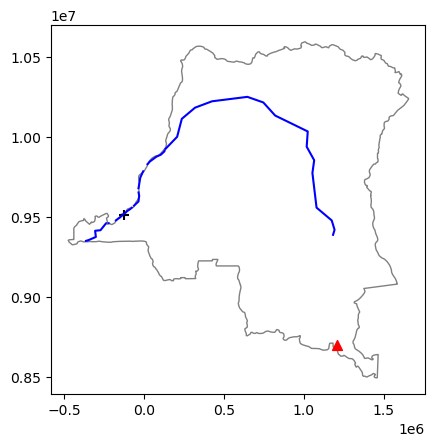

In [13]:
# Finalmente, se plotean los centros de salud comunitarios que están más cerca y más lejos del Congo
base = CDR.plot(color='white', edgecolor='grey')

CDR_rivers.iloc[[3], :].plot(ax=base,markersize=50, color = 'blue')
S_Com.iloc[[0],:].plot(ax=base,markersize=50, color = 'red', marker="^")
S_Com.iloc[[3],:].plot(ax=base,markersize=50, color = 'black',marker="+")

## TAREA 3: 
Create a set of points and a set of polygons

Compute the distance matrix for both sets.

Select one polygon of the distance matrix, and plot the closests and the farthest point to that polygon.

In [14]:
# Primero, se aisla al Congo y se crea un polígono a partir de él
Congo_Riv = CDR_rivers.iloc[[3], :]

WNile_riv = CDR_rivers.iloc[[4], :]
WNile_riv,Congo_Riv

(         NAME SYSTEM                                           geometry
 4  White Nile   Nile  LINESTRING (1598602.821 10179835.452, 1641584....,
     NAME SYSTEM                                           geometry
 3  Congo  Congo  MULTILINESTRING ((131058.087 9919826.249, 1279...)

In [15]:
# Después, se crea un hull con el Congo y el Nilo Blanco, y se convierten en gdfs con el crs deseado
Congo_Hull=Congo_Riv.convex_hull.to_frame()
Congo_Hull['Rio']=['Congo']
Congo_Hull.rename(columns={0:'geometry'},inplace=True)
Congo_Hull=Congo_Hull.set_geometry('geometry')
Congo_Hull.crs="EPSG:32734"

WNile_Hull=WNile_riv.convex_hull.to_frame()
WNile_Hull['Rio']=['White_Nile']
WNile_Hull.rename(columns={0:'geometry'},inplace=True)
WNile_Hull=WNile_Hull.set_geometry('geometry')
WNile_Hull.crs="EPSG:32734"

Congo_Hull, WNile_Hull

(                                            geometry    Rio
 3  POLYGON ((-368294.686 9346591.097, 236936.814 ...  Congo,
                                             geometry         Rio
 4  LINESTRING (1598602.821 10179835.452, 1641584....  White_Nile)

<Axes: >

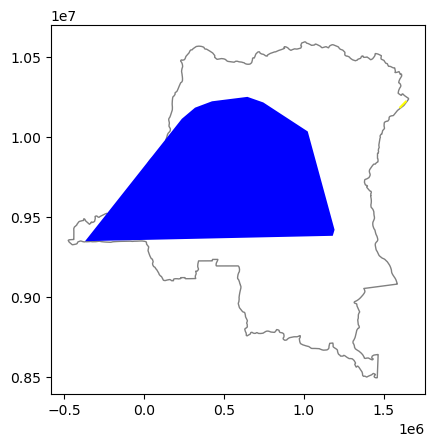

In [16]:
# Se grafican los hulls (Esto no lo pidió, pero me parecía relevante para ver cómo quedaron)
base = CDR.plot(color='white', edgecolor='grey')

Congo_Hull.plot(ax=base,markersize=50, color = 'blue')
WNile_Hull.plot(ax=base,markersize=50, color = 'yellow')

In [17]:
# Tiene sentido, porque el Nilo Blanco nace en el lago Albert del Congo (En su frontera con Uganda), pero de ahí va por otros países

In [18]:
# Ahora, se calcula la matriz de distancias entre los establecimientos comunitarios de salud y el hull del Congo
Matriz_Hull=Congo_Hull.set_index('Rio').geometry.apply\
(lambda g: S_Com.set_index('Facility').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

Matriz_Hull

Facility,Action Communautaire Centre de Santé_Haut Katanga,Bulape Communautaire Centre de Santé_Kasai Occidental,Communau Poste de Santé_Kwilu,Communautaire Centre de Santé_Haut Katanga,Communautaire Centre de Santé_Kinshasa
Rio,,,,,
Congo,684.747589,0.0,0.0,571.862382,0.0


<Axes: >

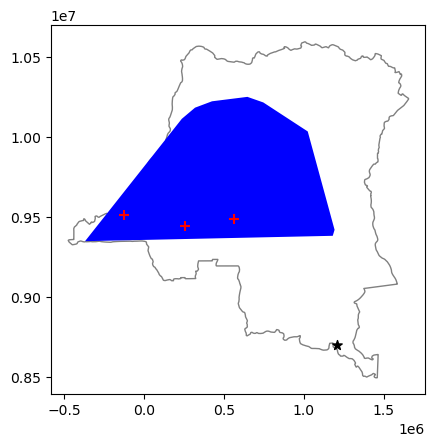

In [19]:
# Ahora, se plotean los puntos más cercanos y el punto más lejano, junto al polígono del rio Congo
# Como hay tres puntos que están literalmente al lado del río, se ploteará a los tres. 
base = CDR.plot(color='white', edgecolor='grey')

Congo_Hull.plot(ax=base,markersize=50, color = 'blue')
S_Com.iloc[[2,3,4],:].plot(ax=base,markersize=50, color = 'red', marker="+")
S_Com.iloc[[0],:].plot(ax=base,markersize=50, color = 'black',marker="*")

## TAREA 4: 
Create a set of points and a set of lines

Get the buffer for the lines, select different values for the distance.

Keep the points that are within the buffer (as in point 2, you need to play with differn distances until you show something interesting.

In [20]:
# Como los datos de las organizaciones comunitarias de salud no son muchos, se calculará una matriz de distancia entre los rios
# y las universidades
Distancias_RiosUni=CDR_rivers.set_index('NAME').geometry.apply\
(lambda g: E_Uni.set_index('Name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
Distancias_RiosUni

Name,Bureau Administratif Université Methodiste_university,Bureau ISBTP/Beni_university,Bâtiment de Licence UPKAN_university,Cybercafé & auditoires_university,Faculté d'Agronomie_university,Faculté d'Architecture_university,Faculté de Médecine_university,Guesthouse & accueil_university,IEM_university,ISBN de Beni_university,...,Université UCBC_university,Université de Bunia_university,Université de Développement de Lubero_university,Université de Kalemie_university,Université de Réveil Christ Roi_university,Université du Cepromad de Bunia_university,Université du Cepromad_university,Université Évangélique pour le Progrès de l'Ituri_university,Univertisité de Kisangani_university,faculté de sience et de droit_university
NAME,,,,,,,,,,,,,,,,,,,,,
Congo,422.438163,422.192415,472.608343,54.734390,672.251819,54.772214,673.231389,54.749842,13.733486,422.685834,...,424.862553,527.959087,375.789482,231.586854,397.138967,527.210033,1.019666,529.104192,4.454125,14.071191
Lualaba,97.290286,724.703078,517.831861,1282.337351,92.910437,1282.275644,93.221500,1282.299651,1167.743923,724.982495,...,729.871984,868.454818,646.464385,225.364066,678.867055,868.509687,1272.572797,869.090643,710.213899,1283.419309
Lukaga,414.602262,499.095161,526.044065,1363.285388,525.333282,1363.219093,525.634655,1363.240577,1167.743923,499.225846,...,503.811853,627.649128,425.636498,6.491856,456.237727,627.945211,1319.575066,628.037469,678.604322,1327.375276
Ubangi,1201.637245,241.724028,776.935985,594.070285,1592.358350,594.033209,1593.165736,594.034103,43.854718,241.366916,...,236.549434,94.490224,318.681079,932.747582,286.905245,94.520812,485.208846,93.786320,326.662103,479.249524
White Nile,1322.398659,197.257969,1257.883133,1937.892745,1522.387116,1937.830778,1523.175706,1937.845475,1414.343796,196.811962,...,192.482569,65.628906,268.159244,861.027429,238.663771,66.492692,1854.984001,64.481214,645.292821,1857.064059
Zambezi,260.245452,1394.732303,605.581274,1221.739769,330.281571,1221.684457,330.927829,1221.708829,1397.533575,1395.028504,...,1399.919670,1539.418249,1316.581358,770.117299,1348.901548,1539.454026,1234.818746,1540.071530,1280.739965,1247.037702


In [21]:
# Ahora, se crea el buffer alrededor de los ríos. El tamaño del buffer fue elegido de forma arbitraria, pero se intentó que 
# envuelva a varios puntos
Rivers_Buffer = CDR_rivers.buffer(distance = 20000)

<Axes: >

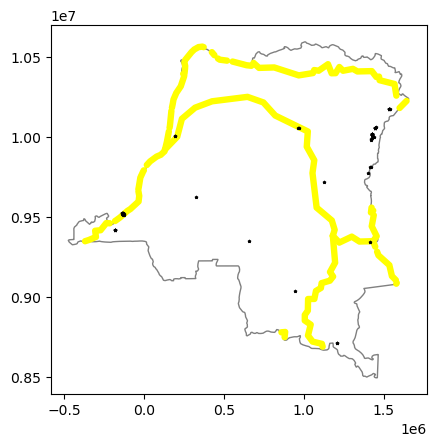

In [22]:
# Se grafica a los buffers junto a las universidades
base = CDR.plot(color='white', edgecolor='grey')

Rivers_Buffer.plot(ax=base,markersize=50, color = 'yellow')
E_Uni.plot(ax=base,markersize=3, color = 'black',marker="*")


In [23]:
# Resulta curioso que haya un clump de universidades completamente alejadas de los ríos. Sin embargo, esta universidades están en
# los estados de Kivu del Norte y Sur, que están en la macroregión africana de los Grandes Lagos, por lo que sus necesidades de agua están
# suplidas. Esta zona es volcánica y tiene inmensos yacimientos minerales, pero también muchos conflictos.

In [24]:
# Ahora, se clippean los puntos dentro del buffer
Uni_Buffer=E_Uni.clip(mask=Rivers_Buffer)
Uni_Buffer

,Name,amenity,geometry
14,Université du Cepromad_university,university,POINT (-132049.842 9512147.648)
17,Université Révérend KIM_university,university,POINT (-125087.502 9512229.269)
11,Université CEPROMAD_university,university,POINT (-125492.320 9513952.430)
12,Institut du Pétrole et du Gaz_university,university,POINT (-128892.538 9516454.125)
20,Université de Kalemie_university,university,POINT (1410574.080 9339589.401)
57,Institut Superieur Technologie Moderne_university,university,POINT (-134086.116 9516536.342)
13,Institut Superieur Pedagogique Et Technique De...,university,POINT (-134660.822 9519508.176)
15,Université Révérend Kim_university,university,POINT (-133935.292 9519522.555)
16,Institut Supérieure d'architecture et d'Urbani...,university,POINT (-134266.535 9520134.801)
51,Institut Supérieur des Sciences de Santé de la...,university,POINT (-131879.638 9520290.648)


<Axes: >

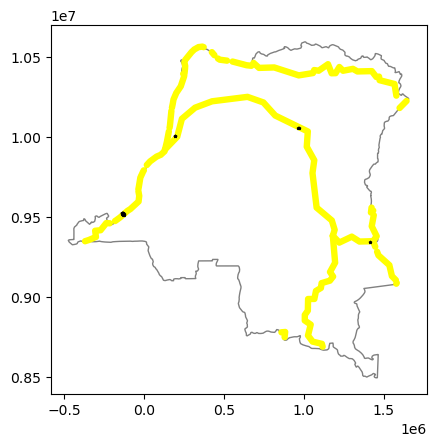

In [25]:
#Finalmente, se grafica de nuevo todo, con los datos clippeados
base = CDR.plot(color='white', edgecolor='grey')

Rivers_Buffer.plot(ax=base,markersize=50, color = 'yellow')
Uni_Buffer.plot(ax=base,markersize=3, color = 'black',marker="*")

In [26]:
# Aquí termina la parte 1 de la evaluación 4.